# Clean Dataset

### Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot
import folium
from folium import plugins
import warnings
from matplotlib.patches import Rectangle

### Dataset

In [46]:
# get the data named Arrest_Data_from_2010_to_2019_20240121.csv

df = pd.read_csv('Arrest_Data_from_2010_to_2019_20240121.csv')
df 

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,2377805,BOOKING,06/22/2010,1845.0,16,Foothill,1664,46,F,W,...,MISDEMEANOR COMPLAINT FILED,PENDLETON,GLENOAKS,34.2375,-118.3745,POINT (-118.3745 34.2375),06/22/2010 12:00:00 AM,2108.0,VALLEY - JAIL DIV,4279.0
1,121920046,RFC,09/28/2012,930.0,19,Mission,1998,60,M,H,...,MISDEMEANOR COMPLAINT FILED,7600 WOODMAN AV,NaN,34.2111,-118.4309,POINT (-118.4309 34.2111),NaN,NaN,NaN,NaN
2,101820989,RFC,10/20/2010,700.0,18,Southeast,1829,14,M,H,...,NaN,7200 QUAIL DR,NaN,34.1025,-118.2091,POINT (-118.2091 34.1025),NaN,NaN,NaN,NaN
3,90712341,RFC,03/10/2011,940.0,7,Wilshire,776,45,M,B,...,MISDEMEANOR COMPLAINT FILED,4500 W WASHINGTON BL,NaN,34.0399,-118.3375,POINT (-118.3375 34.0399),NaN,NaN,NaN,NaN
4,121909585,RFC,04/01/2012,1715.0,19,Mission,1993,37,M,H,...,MISDEMEANOR COMPLAINT FILED,8100 SEPULVEDA PL,NaN,34.2208,-118.4662,POINT (-118.4662 34.2208),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320978,2556456,BOOKING,11/23/2010,1100.0,6,Hollywood,669,37,M,B,...,FELONY COMPLAINT FILED,SANTA MONICA,SERRANO,34.0908,-118.3060,POINT (-118.306 34.0908),11/23/2010 12:00:00 AM,1407.0,HOLLYWOOD,4206.0
1320979,5211592,BOOKING,01/22/2018,2130.0,20,Olympic,2054,14,M,H,...,PROBATION,SAN MARINO ST,ARDMORE AV,34.0545,-118.3020,POINT (-118.302 34.0545),01/22/2018 12:00:00 AM,2335.0,METRO - JAIL DIVISION,4273.0
1320980,5332367,BOOKING,06/06/2018,615.0,1,Central,182,36,M,O,...,FELONY COMPLAINT FILED,1200 S GRAND AV,NaN,34.0401,-118.2633,POINT (-118.2633 34.0401),06/06/2018 12:00:00 AM,815.0,METRO - JAIL DIVISION,4273.0
1320981,3570493,BOOKING,05/24/2013,925.0,10,West Valley,1023,28,M,W,...,MISDEMEANOR COMPLAINT FILED,19000 VANOWEN ST,NaN,34.1938,-118.5470,POINT (-118.547 34.1938),05/24/2013 12:00:00 AM,1111.0,VALLEY - JAIL DIV,4279.0


### Missing values for each column

In [47]:
# get the number of missing values for each column

# Calculate the percentage of missing values for each column
missing_percentages = df.isnull().mean() * 100

# Print the percentage of missing values for each column
display("Percentage of missing values per column:")
display(missing_percentages)

'Percentage of missing values per column:'

Report ID                    0.000000
Report Type                  0.000000
Arrest Date                  0.000000
Time                         0.014837
Area ID                      0.000000
Area Name                    0.000000
Reporting District           0.000000
Age                          0.000000
Sex Code                     0.000000
Descent Code                 0.000000
Charge Group Code            6.221579
Charge Group Description     6.261625
Arrest Type Code             0.000000
Charge                       0.000076
Charge Description           6.221579
Disposition Description      8.017590
Address                      0.000000
Cross Street                42.974966
LAT                          0.000000
LON                          0.000000
Location                     0.000000
Booking Date                31.381706
Booking Time                31.381857
Booking Location            31.399723
Booking Location Code       31.384355
dtype: float64

### Number of unique values per column

In [48]:
# Calculate the number of unique values for each column
unique_counts = df.nunique()

# Print the number of unique values for each column
display("Number of unique values per column:")
display(unique_counts)

'Number of unique values per column:'

Report ID                   1320983
Report Type                       2
Arrest Date                    3652
Time                           1441
Area ID                          21
Area Name                        21
Reporting District             1351
Age                              97
Sex Code                          2
Descent Code                     19
Charge Group Code                29
Charge Group Description         27
Arrest Type Code                  6
Charge                         9075
Charge Description             2395
Disposition Description          25
Address                       84413
Cross Street                  20937
LAT                            5335
LON                            5048
Location                      56393
Booking Date                   3717
Booking Time                   1440
Booking Location                 24
Booking Location Code            41
dtype: int64

### Removing columns with no propose for our work

In [49]:
# Columns to be removed
columns_to_drop = [
    'Report ID', 
    'Area ID', 
    'Charge Group Code', 
    'Charge', 
    'Cross Street', 
    'Booking Time', 
    'Booking Location', 
    'Booking Location Code',
    'Booking Date'
]


# Create a copy of the DataFrame without the specified columns
modified_df = df.drop(columns=columns_to_drop)

#A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

code_to_description = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Substituindo os códigos pelas descrições completas
modified_df['Descent Code'] = modified_df['Descent Code'].map(code_to_description)

# since we are mostly interested in charges
modified_df['Year'] = modified_df['Arrest Date'].str[-4::].astype('int')
modified_df['Hour'] = (modified_df['Time'] // 100) % 24
modified_df['Minutes'] = ((modified_df['Time'] // 100) *  60) + (df['Time'] % 100)

# Save the modified copy to a new .csv file
modified_df.to_csv('final.csv', index=False)

modified_df

,Report Type,Arrest Date,Time,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Description,Arrest Type Code,Charge Description,Disposition Description,Address,LAT,LON,Location,Year,Hour,Minutes
0,BOOKING,06/22/2010,1845.0,Foothill,1664,46,F,White,Larceny,F,GRAND THEFT MONEY/PROPERTY > $400,MISDEMEANOR COMPLAINT FILED,PENDLETON,34.2375,-118.3745,POINT (-118.3745 34.2375),2010,18.0,1125.0
1,RFC,09/28/2012,930.0,Mission,1998,60,M,Hispanic/Latin/Mexican,NaN,M,NaN,MISDEMEANOR COMPLAINT FILED,7600 WOODMAN AV,34.2111,-118.4309,POINT (-118.4309 34.2111),2012,9.0,570.0
2,RFC,10/20/2010,700.0,Southeast,1829,14,M,Hispanic/Latin/Mexican,Other Assaults,M,BATTERY,NaN,7200 QUAIL DR,34.1025,-118.2091,POINT (-118.2091 34.1025),2010,7.0,420.0
3,RFC,03/10/2011,940.0,Wilshire,776,45,M,Black,Drunkeness,M,DRINKING IN PUBLIC,MISDEMEANOR COMPLAINT FILED,4500 W WASHINGTON BL,34.0399,-118.3375,POINT (-118.3375 34.0399),2011,9.0,580.0
4,RFC,04/01/2012,1715.0,Mission,1993,37,M,Hispanic/Latin/Mexican,NaN,M,NaN,MISDEMEANOR COMPLAINT FILED,8100 SEPULVEDA PL,34.2208,-118.4662,POINT (-118.4662 34.2208),2012,17.0,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320978,BOOKING,11/23/2010,1100.0,Hollywood,669,37,M,Black,Narcotic Drug Laws,F,TRANSPORT/SELL/FURNISH/ETC MARIJUANA,FELONY COMPLAINT FILED,SANTA MONICA,34.0908,-118.3060,POINT (-118.306 34.0908),2010,11.0,660.0
1320979,BOOKING,01/22/2018,2130.0,Olympic,2054,14,M,Hispanic/Latin/Mexican,Miscellaneous Other Violations,F,DEFACE PROPERTY,PROBATION,SAN MARINO ST,34.0545,-118.3020,POINT (-118.302 34.0545),2018,21.0,1290.0
1320980,BOOKING,06/06/2018,615.0,Central,182,36,M,Other,Aggravated Assault,F,ATTEMPT - MURDER,FELONY COMPLAINT FILED,1200 S GRAND AV,34.0401,-118.2633,POINT (-118.2633 34.0401),2018,6.0,375.0
1320981,BOOKING,05/24/2013,925.0,West Valley,1023,28,M,White,Miscellaneous Other Violations,O,FLASH INCARCERATION,MISDEMEANOR COMPLAINT FILED,19000 VANOWEN ST,34.1938,-118.5470,POINT (-118.547 34.1938),2013,9.0,565.0


# ExploratoryDataAnalysis

### Get the profile of type of people that get arrested

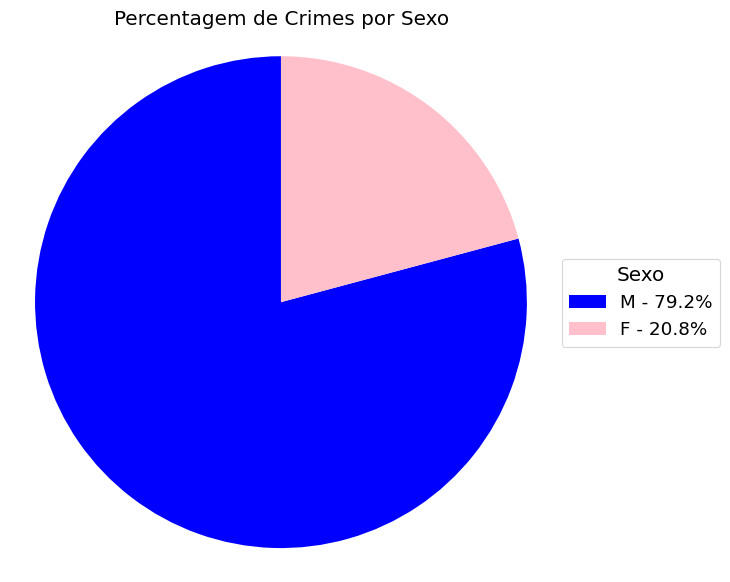

In [50]:
import matplotlib.pyplot as plt

# Calculando as proporções de homens e mulheres
proporcoes_sexo = modified_df['Sex Code'].value_counts(normalize=True)

# Gerando etiquetas para a legenda com as percentagens
labels_legenda = [f'{sexo} - {percentual*100:.1f}%' for sexo, percentual in proporcoes_sexo.items()]

# Criando o gráfico circular
plt.figure(figsize=(7, 7))
patches, texts = plt.pie(proporcoes_sexo, startangle=90, colors=['blue', 'pink'])  # Assumindo M para homens e F para mulheres

# Adicionando o título
plt.title('Percentagem de Crimes por Sexo')

# Adicionando a legenda com as percentagens
plt.legend(patches, labels_legenda, title="Sexo", loc="center left", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Mantém o gráfico circular
plt.show()


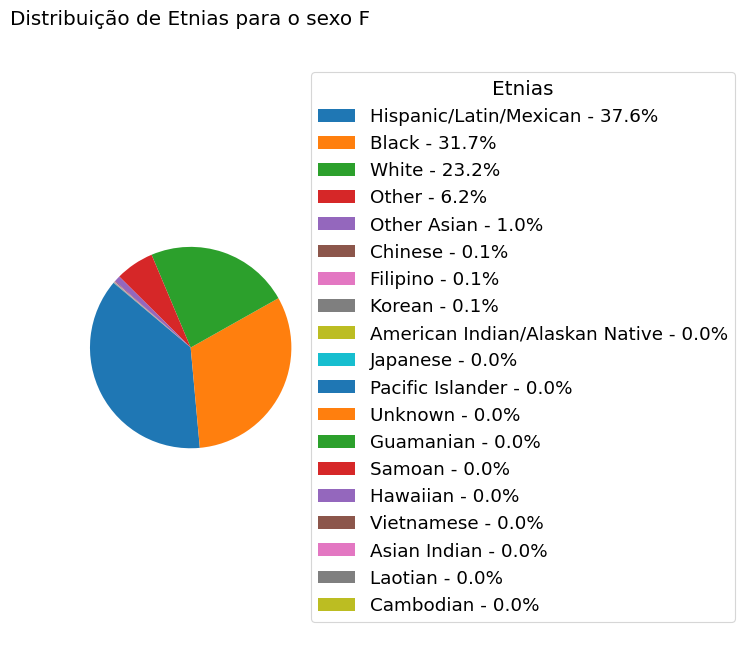

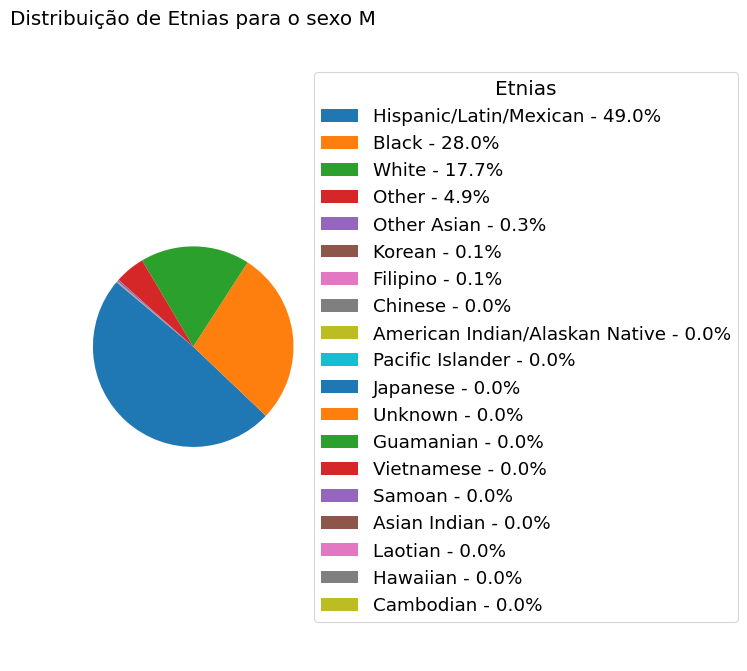

In [51]:
# Gráficos para a distribuição de etnias por sexo
for sex in modified_df['Sex Code'].unique():
    # Calculando proporções
    proporcoes_etnia = modified_df[modified_df['Sex Code'] == sex]['Descent Code'].value_counts(normalize=True)
    
    # Calculando as percentagens para as etiquetas da legenda
    labels = [f'{index} - {value*100:.1f}%' for index, value in proporcoes_etnia.items()]
    
    # Criando o gráfico
    plt.figure(figsize=(7, 7))
    patches, texts = plt.pie(proporcoes_etnia, startangle=140)  # Ajustado aqui
    
    # Melhorando a visualização
    plt.title(f'Distribuição de Etnias para o sexo {sex}')
    
    # Criando a legenda com as etiquetas que incluem as percentagens
    plt.legend(patches, labels, title="Etnias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()


### Evolution of the number of arrests over the years 2010-2019

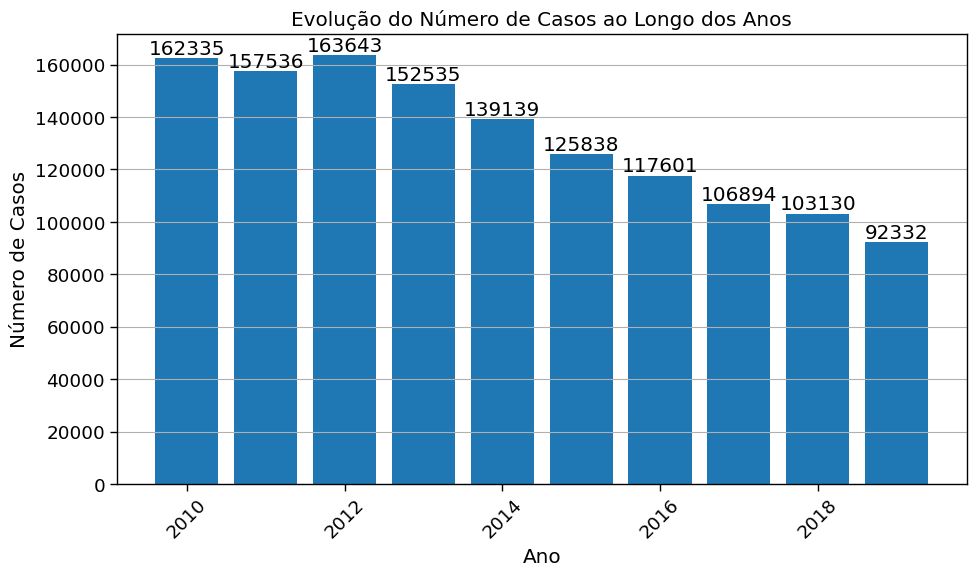

In [52]:
# Convertendo 'Arrest Date' para datetime
modified_df['Arrest Date'] = pd.to_datetime(modified_df['Arrest Date'], format='%m/%d/%Y')

# Extraindo o ano de 'Arrest Date'
modified_df['Year'] = modified_df['Arrest Date'].dt.year

# Calculando o número de casos por ano
casos_por_ano = modified_df.groupby('Year').size()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(casos_por_ano.index, casos_por_ano.values)

plt.title('Evolução do Número de Casos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.grid(axis='y')  # Adicionando uma grade horizontal para melhor leitura

# Adicionando as legendas com os valores acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()  # Ajusta automaticamente o layout
plt.show()


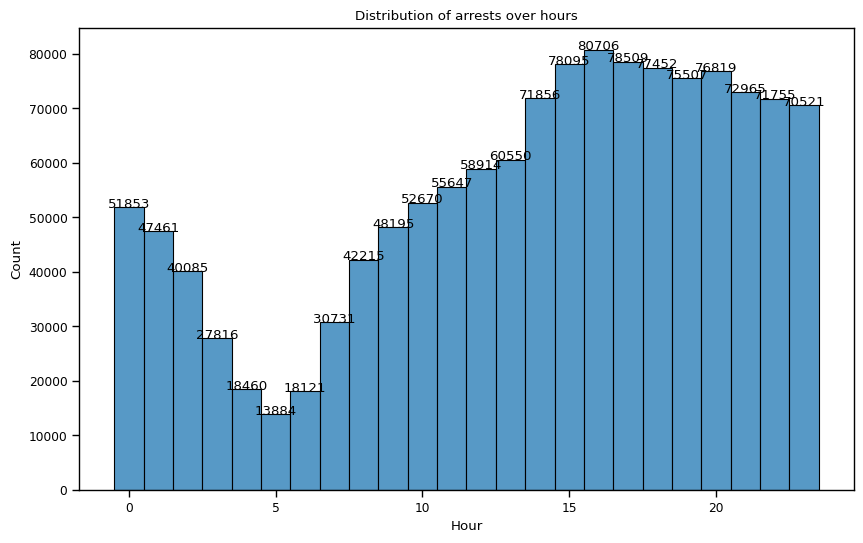

In [53]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_context("paper", font_scale=1)
plt.title("Distribution of arrests over hours")

# Criando o histograma e capturando o objeto Axes retornado
ax = sns.histplot(data=modified_df, x='Hour', discrete=True)

# Etiquetando as barras com o número de ocorrências (altura das barras)
for p in ax.patches:
    # Obtendo a altura da barra, que representa o valor (número de crimes)
    height = p.get_height()
    # Colocando o texto (número de crimes) acima de cada barra
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha='center')

plt.show()

(<Figure size 1250x1700 with 11 Axes>,
 array([<AxesSubplot:ylabel='2010'>, <AxesSubplot:ylabel='2011'>,
        <AxesSubplot:ylabel='2012'>, <AxesSubplot:ylabel='2013'>,
        <AxesSubplot:ylabel='2014'>, <AxesSubplot:ylabel='2015'>,
        <AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>],
       dtype=object))

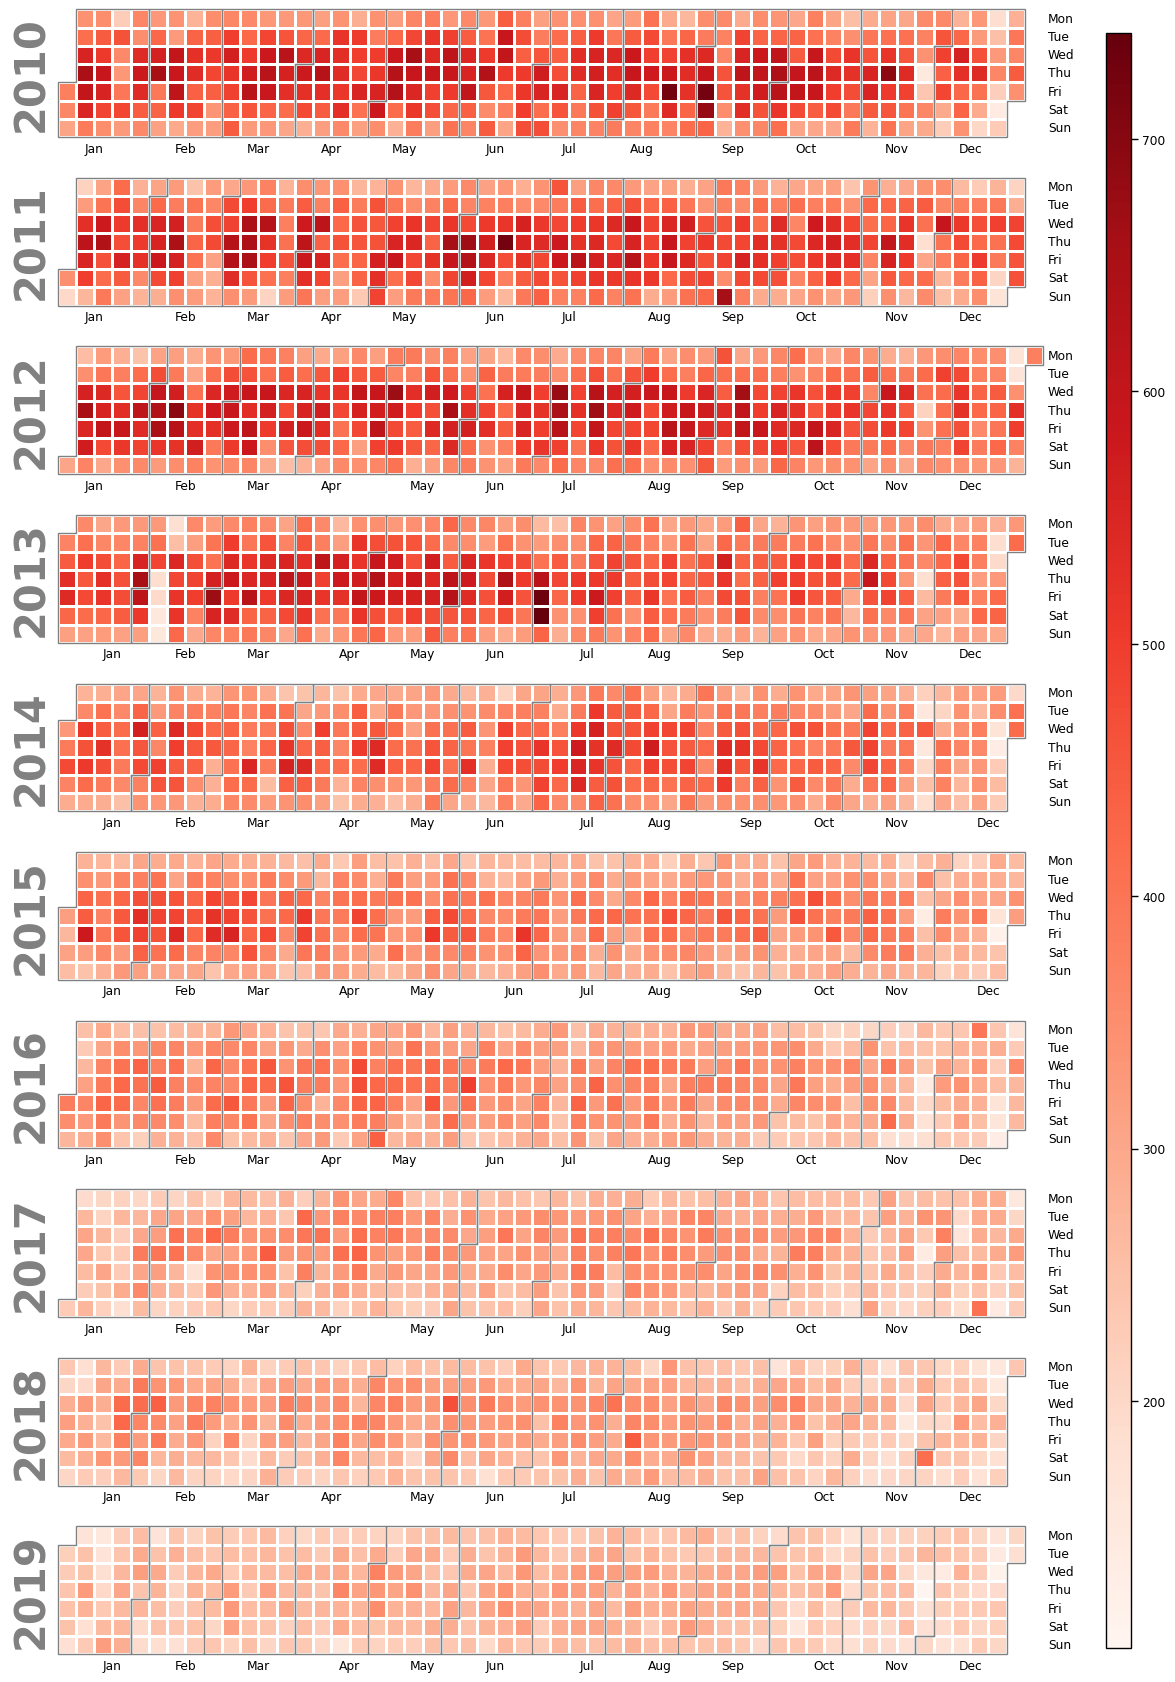

In [54]:
#get from https://www.kaggle.com/code/mariammarchenko/arrests-in-la-2010-2019#TIME
# Seu código de plotagem aqui


modified_df['Date'] = pd.to_datetime(modified_df['Arrest Date'], yearfirst=True)
num_inc = modified_df.groupby('Date')['Date'].count().reset_index(name='counts')
events = pd.Series(num_inc.counts.to_numpy(), index=num_inc.Date.to_numpy())
calplot.calplot(events,
                cmap='Reds')

## Common Crimes by gender

C:\Users\2001d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  del sys.path[0]


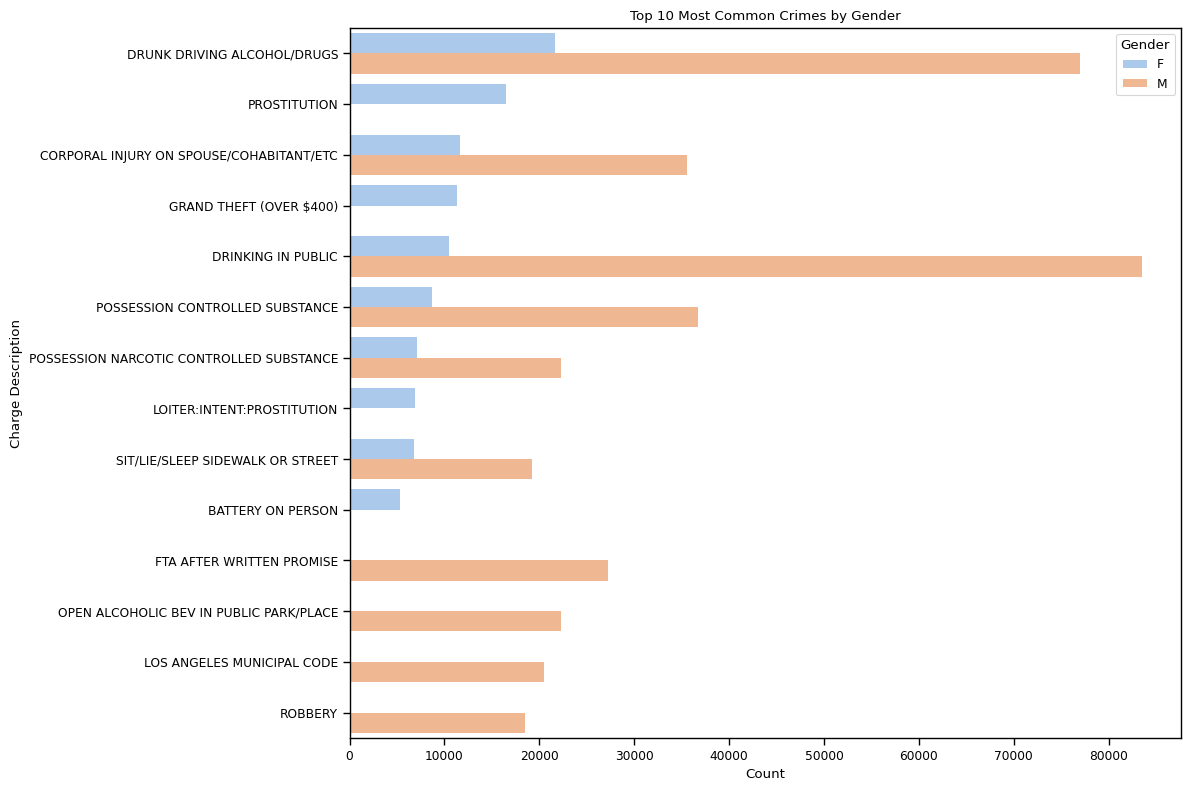

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for non-null 'Charge Description' and 'Sex Code'
filtered_data = df.dropna(subset=['Charge Description', 'Sex Code'])

# Count the top 10 most common charges for each sex
top_charges = filtered_data.groupby(['Sex Code', 'Charge Description']).size().reset_index(name='Count')
top_charges = top_charges.sort_values(['Sex Code', 'Count'], ascending=[True, False]).groupby('Sex Code').head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Charge Description', hue='Sex Code', data=top_charges, ci=None, palette='pastel')
plt.title('Top 10 Most Common Crimes by Gender')
plt.xlabel('Count')
plt.ylabel('Charge Description')
plt.legend(title='Gender')
plt.tight_layout()

plt.show()


## Crime Types for Each area per year

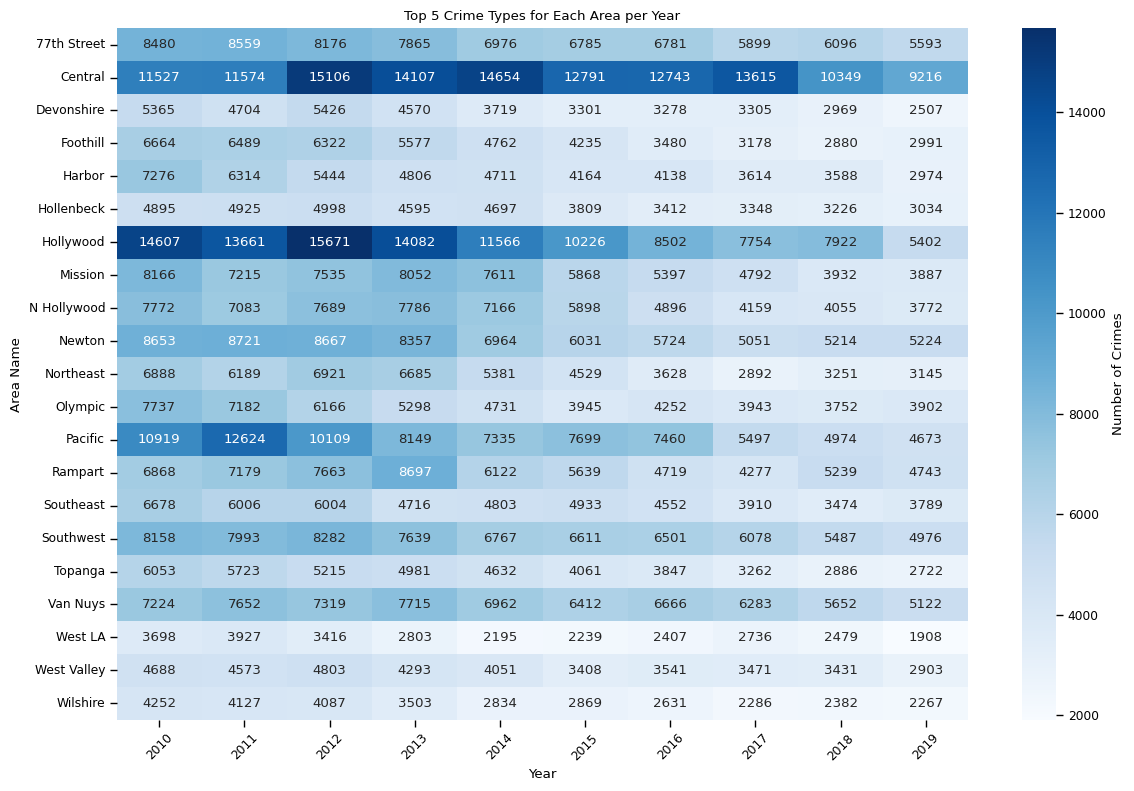

In [60]:


# Convert 'Arrest Date' to datetime format to extract the year
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])

# Extract year from 'Arrest Date'
df['Year'] = df['Arrest Date'].dt.year

# Group data by 'Year', 'Area Name', and 'Charge Group Description' and count occurrences
crime_counts = df.groupby(['Year', 'Area Name', 'Charge Group Description']).size().reset_index(name='Counts')

# Sort data by 'Year' and 'Counts' to find the most common types of crimes for each area per year
crime_counts_sorted = crime_counts.sort_values(by=['Year', 'Area Name', 'Counts'], ascending=[True, True, False])

# Display the top crime types for each area per year (showing top 5 for brevity)
top_crimes_per_year_area = crime_counts_sorted.groupby(['Year', 'Area Name']).head(5)
top_crimes_per_year_area.head(20)

# Create a pivot table to reshape the data for plotting
pivot = df.pivot_table(index='Area Name', columns='Year', values='Charge Group Description', aggfunc='count')

# Fill missing values with 0
pivot.fillna(0, inplace=True)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Number of Crimes'})
plt.title('Top 5 Crime Types for Each Area per Year')
plt.xlabel('Year')
plt.ylabel('Area Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Relationship between Ethnicities and Types of Crimes

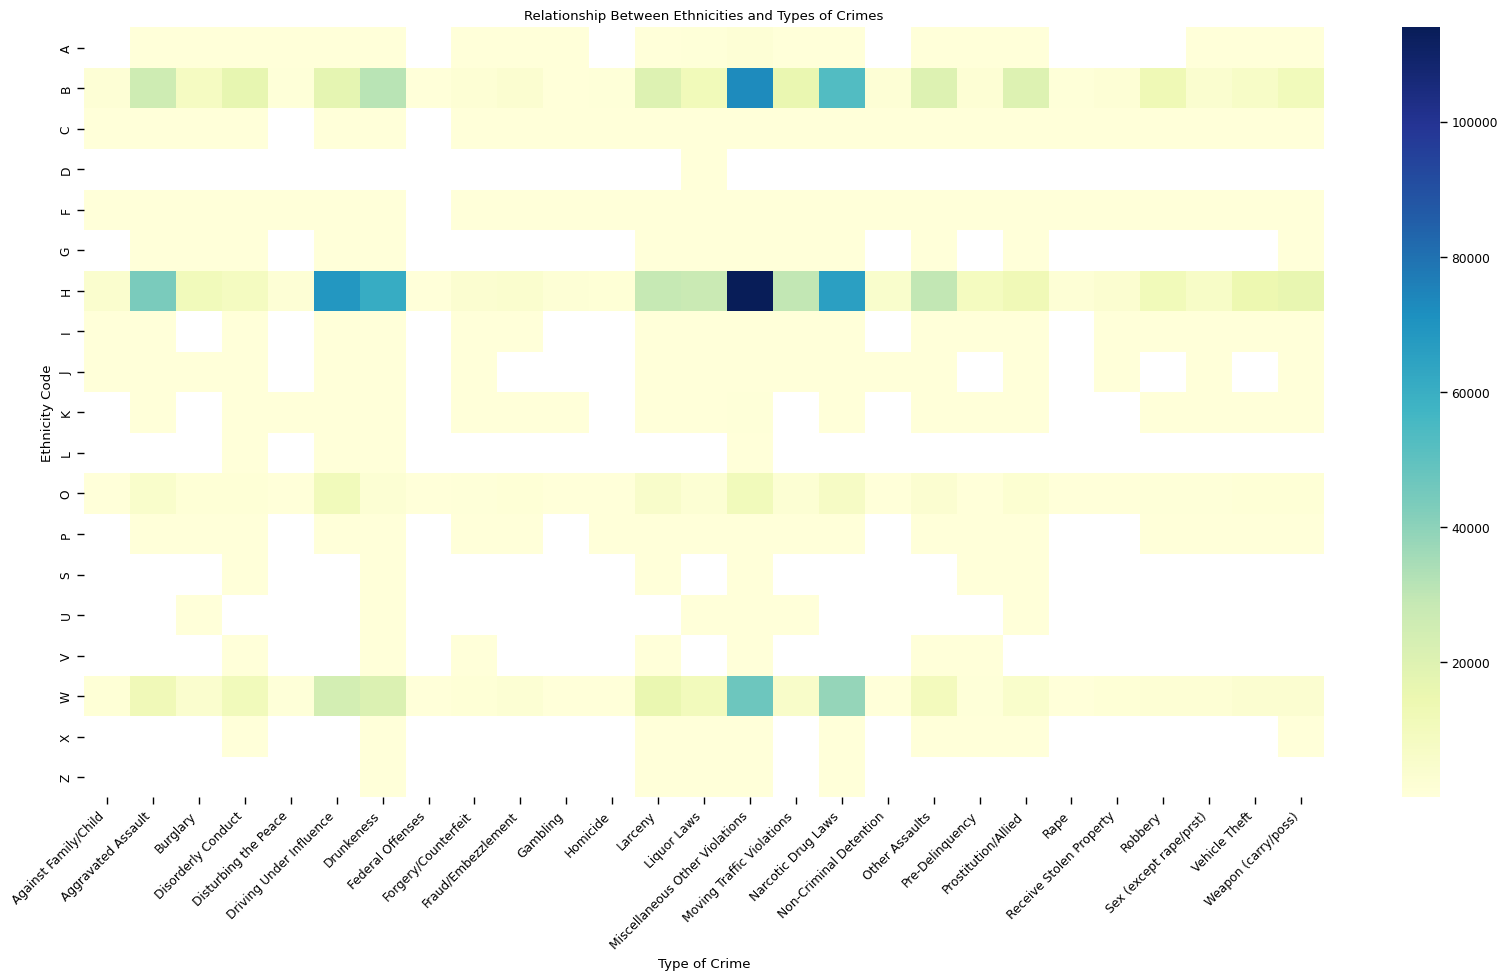

In [61]:

# Group the data by 'Descent Code' and 'Charge Group Description' and count the occurrences
crime_by_ethnicity = df.groupby(['Descent Code', 'Charge Group Description']).size().reset_index(name='Count')

# Pivot the data for better visualization in a heatmap
pivot_table = crime_by_ethnicity.pivot("Descent Code", "Charge Group Description", "Count")

# Use a heatmap to visualize the data
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, fmt="d")
plt.title('Relationship Between Ethnicities and Types of Crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Ethnicity Code')
plt.xticks(rotation=45, ha="right")
plt.show()
